# Spatial Data Science Workshop
## Cristina KADAR & Benjamin RYDER
## 20th September 2017

**Goal:** Familiarize participants with the challenges of working with geo-referenced multi-modal data (governmental data, open data, online digital traces, etc.).

**Problem:** How are Airnbnb prices influenced by the listing properties and the attributes of the neighborhood?

**Data:** We will make the data available for download on the tutorial’s website.

**Software:**

--code: python (pysal, stats, maybe scikit-learn) and Jupiter Notebook.

--visualization: QGIS or cartoDB.

Participants will be required to have the packages/tools pre-installed. We will send the final requirements as soon as we know them.

## Part one 

Import the data

Visualise the data

Test assumptions

In [2]:
%matplotlib inline

from Resources import helpers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysal as ps
import geopandas as gpd
from pysal.contrib.viz import mapping as maps
# need palettable: pip install palettable
from pylab import *

params = {'legend.fontsize': 10}
plt.rcParams.update(params)

In [3]:
shp_link = "./Data/nyc_census_tract_features_v3_export.shp"
tx = gpd.read_file(shp_link)
#tx.columns.tolist()

(array([ 483.,  167.,  219.,  216.,  216.,  231.,  201.,  217.,  217.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

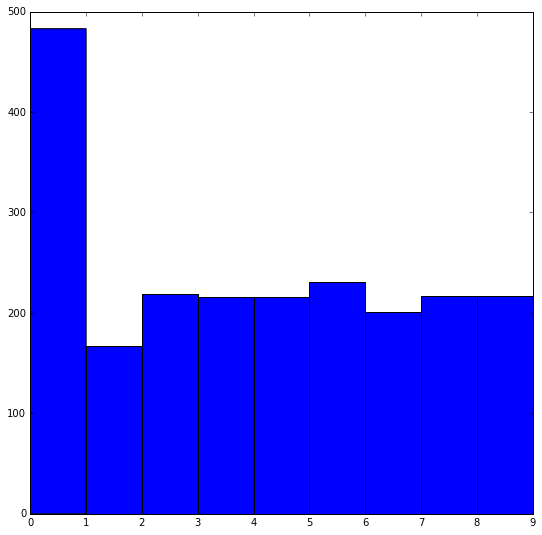

In [8]:
bin_n=10
quantiles = ps.Quantiles(tx.avg_listin,k=bin_n)
f, ax = plt.subplots(1, figsize=(9, 9))
plt.hist(quantiles.yb, bins=range(bin_n))

{'boxes': [<matplotlib.lines.Line2D at 0x11c735940>],
 'caps': [<matplotlib.lines.Line2D at 0x11b2a2eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x104913ba8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x104938898>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11c735978>,
  <matplotlib.lines.Line2D at 0x11c23a278>]}

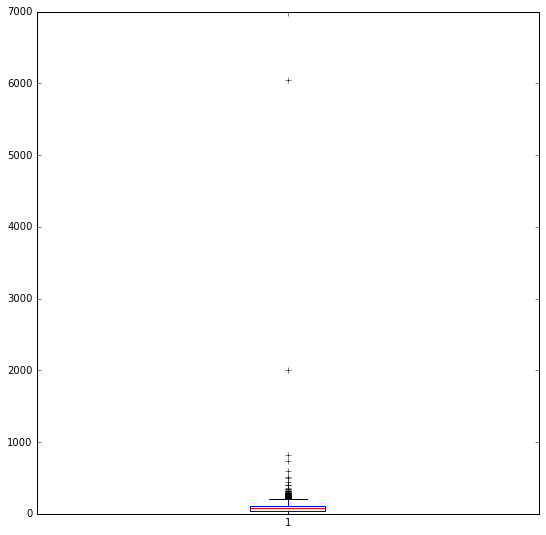

In [9]:
f, ax = plt.subplots(1, figsize=(9, 9))
plt.boxplot(tx.avg_listin, showfliers=True)

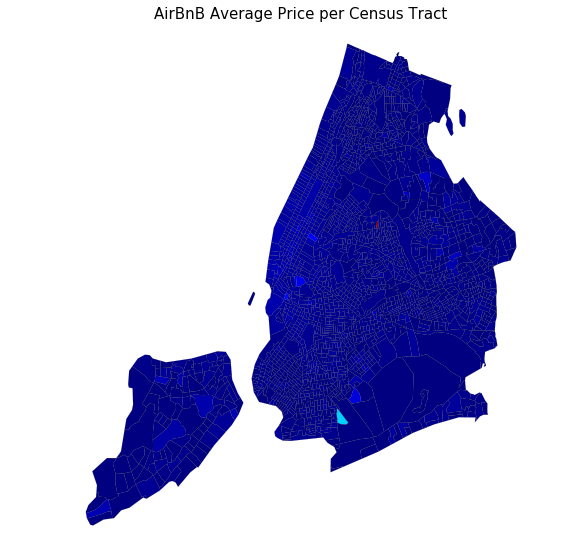

In [5]:
f, ax = plt.subplots(1, figsize=(9, 9))
tx.plot(ax=ax, linewidth=0.1, column='avg_listin')
plt.title('AirBnB Average Price per Census Tract', fontsize=15)
ax.set_axis_off()
plt.show()

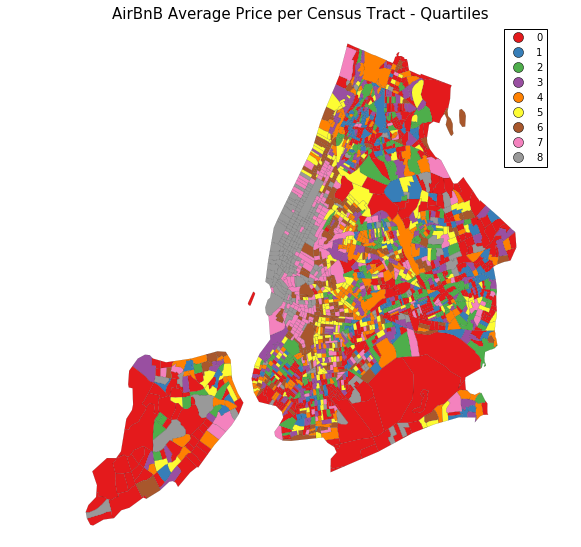

In [10]:
f, ax = plt.subplots(1, figsize=(9, 9))

tx.assign(avg_listin_QT=quantiles.yb).plot(ax=ax, linewidth=0.1, column='avg_listin_QT', \
                                categorical=True, legend=True)

plt.title('AirBnB Average Price per Census Tract - Quartiles', fontsize=15)
ax.set_axis_off()
plt.show()

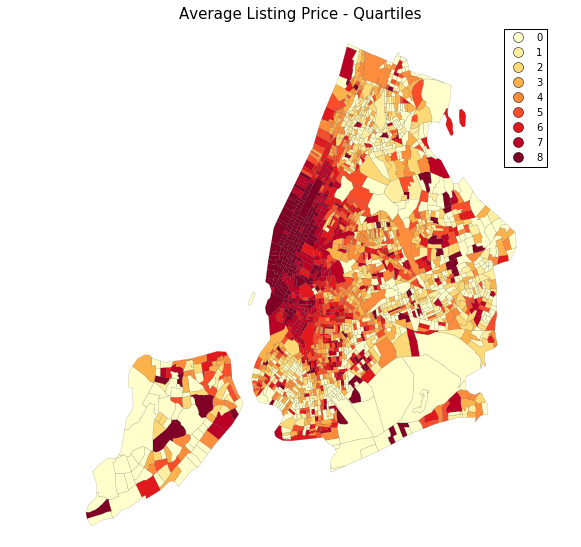

In [12]:
# Color maps can be found at following link:
# https://matplotlib.org/examples/color/colormaps_reference.html

f, ax = plt.subplots(1, figsize=(9, 9))

tx.assign(avg_listin_QT=quantiles.yb).plot(ax=ax, linewidth=0.1, column='avg_listin_QT', \
                                cmap='YlOrRd', categorical=True, legend=True)

plt.title('AirBnB Average Price per Census Tract - Quartiles', fontsize=15)
ax.set_axis_off()
plt.show()